## NOTEBOOK DE EXEMPLO - COPIADO DO MARIO - usado como base para aprendizado no Kaggle - Desafio Churn

* Versão 1

## Problema:
O objetivo desta análise consiste em prever a probabilidade de churn dos clientes de uma empresa de telecomunicações, isto é, a probabilidade de o cliente deixar de ser cliente.

## Controle de versões
1. Versão 1 : Seleção de variáveis - uso de variaveis selecionadas no modelo <br>
Score: ? <br>
2. Versão: Uso de todas as variáveis no modelo<br>
Score: ?

## Configuração do ambiente

In [ ]:
from platform import python_version
print(python_version())

3.6.9


## Obtenção dos dados

### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 72)

### Carregamento dos dados

In [ ]:
url = 'https://raw.githubusercontent.com/Hayltons/DSWP/Kaggle_Churn/Dataframes/1_churn_train.csv'

In [ ]:
df_treino = pd.read_csv(url,sep=',')

### Visualização das linhas iniciais de dados

In [ ]:
df_treino.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,nan,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [ ]:
df_treino.tail()

## Manipulação inicial do banco de dados

### Renomeando as colunas do Dataframe para minusculas

In [ ]:
df_treino.columns = df_treino.columns.str.lower()

In [ ]:
df_treino.columns

### Visualizando o banco de dados

In [ ]:
df_treino.head(10).T  #.T faz a transposta da exibiçao do comando head

### Verificando os tipos de dados

In [ ]:
df_treino.info()

## EDA - Análise Exploratória de Dados

### Separando as variáveis por tipo

In [ ]:
df_quant = df_treino[['tenure','monthlycharges','totalcharges']]
df_categ = df_treino.drop(columns=['id','tenure','monthlycharges','totalcharges','churn'], axis=1)
df_target = df_treino['churn']

In [ ]:
df_quant.head()

,tenure,monthlycharges,totalcharges
0,56.00,45.05,2560.1
1,nan,19.65,332.65
2,60.00,110.80,6640.7
3,37.00,101.90,3545.35
4,29.00,70.75,1974.8


In [ ]:
df_quant.tail()

In [ ]:
df_categ.head()

In [ ]:
df_target.head()

### Variáveis df_quant

#### Verificação dos tipos de dados das variáveis df_quant

In [ ]:
df_quant.dtypes

tenure            float64
monthlycharges    float64
totalcharges       object
dtype: object

#### Correção da variável 'totalcharges'
Essa variável é quantitativa, mas foi importada como sendo do tipo Object. <br>
Portanto, precisa ser alterada para o tipo numerico.

In [ ]:
df_treino['totalcharges'] = pd.to_numeric(df_treino['totalcharges'], errors='coerce')

In [ ]:
df_quant['totalcharges'] = pd.to_numeric(df_quant['totalcharges'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_quant.tail(5)

,tenure,monthlycharges,totalcharges
5629,43.00,44.15,"1,931.30"
5630,nan,108.65,"4,903.20"
5631,28.00,54.65,"1,517.50"
5632,63.00,25.25,"1,573.05"
5633,38.00,95.00,"3,605.60"


#### Verificação dos tipos de dados.
Verifica-se que totalcharges foi corrigida.

In [ ]:
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          5173 non-null   float64
 1   monthlycharges  5634 non-null   float64
 2   totalcharges    5626 non-null   float64
dtypes: float64(3)
memory usage: 132.2 KB


#### Sumário estatístico das variáveis df_quant

In [ ]:
df_quant.describe()

,tenure,monthlycharges,totalcharges
count,"5,173.00","5,634.00","5,626.00"
mean,32.33,64.63,"2,273.51"
std,24.46,30.02,"2,258.38"
min,0.00,18.25,18.80
25%,9.00,35.46,401.59
50%,29.00,70.25,"1,396.12"
75%,55.00,89.80,"3,764.29"
max,72.00,118.75,"8,684.80"


#### Boxplot

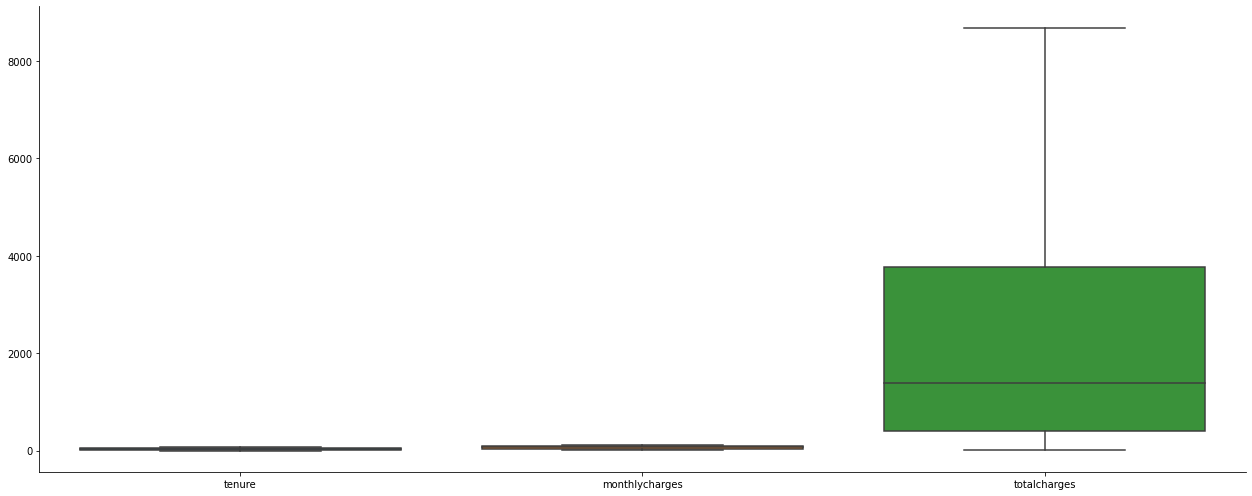

In [ ]:
sns.catplot(data=df_quant,
              kind='box',
              height=7,
              aspect=2.5)

#### Verificação dos missing values das variáveis df_quant

In [ ]:
df_quant.isnull().sum()

tenure            461
monthlycharges      0
totalcharges        8
dtype: int64

#### Variável quantitativa 'monthlycharges'

In [ ]:
df_quant[['monthlycharges']].hist(bins=150)

In [ ]:
df_quant[['monthlycharges']].mode()

In [ ]:
df_quant[['monthlycharges']].describe()

In [ ]:
# Coeficiente de variação
df_quant[['monthlycharges']].std()/df_quant[['monthlycharges']].mean()*100

In [ ]:
sns.catplot(data=df_quant[['monthlycharges']],
              kind='box',
              height=2.5,
              aspect=2.5)

#### Variável quantitativa 'totalcharges'

In [ ]:
df_quant[['totalcharges']].hist(bins=150)

In [ ]:
df_quant[['totalcharges']].describe()

In [ ]:
# Coeficiente de variação
df_quant[['totalcharges']].std() / df_quant[['totalcharges']].mean() * 100

In [ ]:
df_quant[['totalcharges']].mode()

In [ ]:
sns.catplot(data=df_quant[['totalcharges']],
              kind='box',
              height=3,
              aspect=2.5)

In [ ]:
df_quant['totalcharges_2'] = df_quant['totalcharges'].fillna(df_quant['totalcharges'].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_quant[['totalcharges_2']].isnull().any()

totalcharges_2    False
dtype: bool

#### Variável quantitativa 'tenure' (quantidade de meses como cliente da companhia)

In [ ]:
df_quant.head(23).T

In [ ]:
df_quant['RazaoCobrTotalMensal'] = df_quant['totalcharges']/df_quant['monthlycharges']

In [ ]:
df_quant['DiferencapercRazaoCobrTotMensal'] = (df_quant['tenure']-df_quant['RazaoCobrTotalMensal'])/df_quant['tenure']

Verifica-se que a razão entre os valores das variáveis CobrancaTotal e CobrancaMensal é um bom indicador<br>
do valor da variável MesesNaCompanhia. Dessa forma, vamos usar essa razão para preencher os valores faltantes <br>
da variável 'MesesNaCompanhia'.

In [ ]:
df_quant.tail(23).T

In [ ]:
df_quant = df_quant.drop(columns=['RazaoCobrTotalMensal','DiferencapercRazaoCobrTotMensal'],
                   axis=1)

In [ ]:
df_quant.head().T

In [ ]:
df_quant['tenure_2']  = df_quant['tenure'].fillna(df_quant['totalcharges_2']/df_quant['monthlycharges'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_quant.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
tenure,56.00,nan,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,nan,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00
monthlycharges,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10,18.95,94.90,66.85,69.80,84.45,69.60,43.45,90.45,76.05,81.85
totalcharges,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70"
totalcharges_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70"
tenure_2,56.00,16.93,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,46.61,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00


In [ ]:
df_quant_2 = df_quant[['monthlycharges','totalcharges_2','tenure_2']]

In [ ]:
df_quant_2.isnull().sum()

monthlycharges    0
totalcharges_2    0
tenure_2          0
dtype: int64

### Discretização das variáveis quantitativas

In [ ]:
df_quant_2.nunique()

monthlycharges    1505
totalcharges_2    5285
tenure_2           490
dtype: int64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
discretizer = KBinsDiscretizer(n_bins=5,
                              encode='ordinal',
                              strategy='quantile')

In [ ]:
discretizer.fit(df_quant_2)

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='quantile')

In [ ]:
bining = discretizer.fit_transform(df_quant_2)

In [ ]:
df_quant_bining = pd.DataFrame(bining,
                                    columns=['monthlycharges',
                                             'totalcharges_2',
                                             'tenure_2'])

In [ ]:
df_quant_bining.head(30).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
monthlycharges,1.00,0.00,4.00,4.00,2.00,1.00,2.00,0.00,0.00,3.00,0.00,4.00,2.00,2.00,3.00,2.00,1.00,3.00,2.00,3.00,1.00,2.00,1.00,2.00,1.00,3.00,1.00,2.00,4.00,0.00
totalcharges_2,3.00,1.00,4.00,3.00,2.00,3.00,2.00,0.00,2.00,4.00,0.00,3.00,1.00,0.00,4.00,2.00,1.00,4.00,1.00,3.00,1.00,2.00,3.00,3.00,3.00,4.00,3.00,3.00,4.00,1.00
tenure_2,3.00,1.00,4.00,2.00,2.00,4.00,2.00,0.00,3.00,4.00,1.00,3.00,1.00,0.00,4.00,1.00,1.00,4.00,0.00,2.00,1.00,2.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,1.00


### Variáveis categóricas

In [ ]:
df_categ.head()

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,Female,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN
1,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
2,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
3,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
4,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
df_categ.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents          218
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
dtype: int64

#### Contagem de valores da variavel gender (genero)




In [ ]:
df_categ['gender'].value_counts()

#### Tabela de frequencias churn x gender ()

In [ ]:
# Table of churn x gender
Churn_genero = pd.crosstab(index=df_treino["churn"], 
                           columns=df_treino["gender"],
                          margins=True)

Churn_genero.columns=['Female','Male',"rowtotal"]
Churn_genero.index= ["0","1","coltotal"]

Churn_genero

In [ ]:
Churn_genero/Churn_genero.loc["coltotal","rowtotal"]

#Temos missing values em duas variáveis categóricas:
* 'dependents'
* 'paymentmethod'

#### Imputação de missing values na variável 'dependents'
Como 'dependents' é uma variável categórica, criaremos uma nova categoria, chamada 'Miss', a qual será imputada a todos os missing values dessa variável.

In [ ]:
# linha anterior do Mário - df_categ['dependents'] = df_categ['dependents'].fillna(df_categ['dependents']=='Miss')
df_categ['dependents'] = df_categ['dependents'].fillna('Miss')

In [ ]:
df_categ.loc[df_categ.dependents == 'Miss', 'dependents'].head()

73     Miss
89     Miss
110    Miss
156    Miss
179    Miss
Name: dependents, dtype: object

In [ ]:
df_categ['dependents'].isnull().any()

False

#### Imputação de missing values na variável 'paymentmethod'

In [ ]:
df_categ['paymentmethod'] = df_categ['paymentmethod'].fillna('Miss')


In [ ]:
df_categ.loc[df_categ.paymentmethod == 'Miss', 'paymentmethod'].head()

0      Miss
59     Miss
196    Miss
247    Miss
337    Miss
Name: paymentmethod, dtype: object

In [ ]:
df_categ['paymentmethod'].isnull().any()

False

In [ ]:
df_categ.isnull().sum()

In [ ]:
df_treino['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [ ]:
df_categ['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Miss                           99
Name: paymentmethod, dtype: int64

## Verificação da cardinalidade das variaveis categoricas
Como todas as variáveis categóricas têm baixa cardinalidade (quantidade de valores únicos menor que 10), vamos criar variáveis dummy para todas.

In [ ]:
df_categ.nunique()

In [ ]:
dummies = pd.get_dummies(df_categ,
                        prefix_sep='_',
                        drop_first=True)

In [ ]:
dummies.head()

In [ ]:
dummies['seniorcitizen'].unique()

In [ ]:
dummies.columns

## Formação dos bancos de dados explicativas e df_target

In [ ]:
explicativas=pd.concat([df_quant_bining,dummies],
                      axis=1)

In [ ]:
explicativas.columns

In [ ]:
#explicativas.drop(['id'],axis=1,inplace=True)
explicativas.head()

,monthlycharges,totalcharges_2,tenure_2,seniorcitizen,gender_Male,partner_Yes,dependents_No,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,paymentmethod_Miss
0,1.00,3.00,3.00,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0.00,1.00,1.00,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2,4.00,4.00,4.00,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0
3,4.00,3.00,2.00,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
4,2.00,2.00,2.00,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
df_target.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

## Separação dos conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas,
                                                       df_target,
                                                       test_size=0.3,
                                                      random_state=42)

## Tuninng de hiperparâmetros
Inicialmente, chamar o módulo de tuning.<br>
Passo a passo <br>
1 - definir um dict(dicionario com os valores dos hiperparams)<br>
2 - chamar o modulo de tunning<br>
3 - chamar obj do tunning<br>
4 - treinamento<br>
5 - avaliar os resultados

### Chamar o módulo de Tuning

In [ ]:
from sklearn.model_selection import  GridSearchCV

### Chamar módulo de acurácia

In [ ]:
from sklearn.metrics import accuracy_score

### Random Forest

In [ ]:
import timeit

In [ ]:
#1
rf_dict = {                            # nome do dicionário que está sendo criado.
    'n_estimators':[40,50,60,70],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True],  # Faz amostragem com e sem reposição.
    'random_state': [42]
}


In [ ]:
#2
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#3
rf = RandomForestClassifier(random_state=42)


In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=rf_dict,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)


In [ ]:
import joblib # DÚVIDA (precisa desse joblib?)

In [ ]:
rf_grid.fit(x_treino, y_treino)#.values.ravel()  colocar este comando depois de y_treino se precisar.

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
rf_grid.best_score_

0.7829101073057894

In [ ]:
accuracy_score(y_teste, rf_grid.predict(x_teste))

0.7871082199881727

### Gradient Boosting

In [ ]:
gb_dict = { 
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    'random_state': [1967]    
    }

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
gb_grid = GridSearchCV(estimator=gb,
                       param_grid=gb_dict,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1 # ACELERA O TEMPO DE PROCESSAMENTO
                      )

In [ ]:
gb_grid.fit(x_treino,y_treino)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [ ]:
gb_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'random_state': 1967}

In [ ]:
gb_grid.best_score_

0.8077735655079354

In [ ]:
gb_grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1967, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Salvar melhor modelo

In [ ]:
import joblib

In [ ]:
joblib.dump(gb_grid.best_estimator_,
            'modelo_exemplo_gb.pkl',
            compress=1)

['modelo_exemplo_gb.pkl']

### Score do grupo de teste

In [ ]:
url = 'https://raw.githubusercontent.com/Hayltons/DSWP/Kaggle_Churn/Dataframes/2_churn_test.csv'
df_teste = pd.read_csv(url, sep=',')

In [ ]:
df_teste.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.00,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.00,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.00,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [ ]:
# Renomeando as colunas do Dataframe para minusculas
df_teste.columns = df_teste.columns.str.lower()

In [ ]:
# Separando as variáveis por tipo
df_quant_teste = df_teste[['tenure','monthlycharges','totalcharges']]
df_categ_teste = df_teste.drop(columns=['id','tenure','monthlycharges','totalcharges'], axis=1)

In [ ]:
df_quant_teste.head()

,tenure,monthlycharges,totalcharges
0,23.00,20.00,445.3
1,61.00,99.00,5969.3
2,36.00,84.75,3050.15
3,61.00,61.45,3751.15
4,47.00,20.55,945.7


In [ ]:
df_categ_teste.head()

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic)
1,Male,1,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN
2,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
3,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check


In [ ]:
# Correção da variável 'totalcharges' (Objet para Numeric)
df_quant_teste['totalcharges'] = pd.to_numeric(df_quant_teste['totalcharges'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_quant_teste.dtypes

tenure            float64
monthlycharges    float64
totalcharges      float64
dtype: object

In [ ]:
df_quant_teste.isnull().sum()

tenure            118
monthlycharges      0
totalcharges        3
dtype: int64

In [ ]:
# Corrige NaNs na variável 'totalcharges' substituindo pela Moda
df_quant_teste['totalcharges_2'] = df_quant_teste['totalcharges'].fillna(df_quant_teste['totalcharges'].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_quant_teste[['totalcharges_2']].isnull().any()

totalcharges_2    False
dtype: bool

In [ ]:
# Corrige a variável 'tenure' substituindo por um valor calculado ('totalcharges_2 / 'monthlycharges)
df_quant_teste['tenure_2']  = df_quant_teste['tenure'].fillna(df_quant_teste['totalcharges_2'] / df_quant_teste['monthlycharges'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_quant_teste['tenure_2'].isnull().any()

False

In [ ]:
# cria COPIA de df_quant_teste
df_quant_teste_2 = df_quant_teste[['monthlycharges','totalcharges_2','tenure_2']]

In [ ]:
df_quant_teste_2.head()

,monthlycharges,totalcharges_2,tenure_2
0,20.00,445.30,23.00
1,99.00,"5,969.30",61.00
2,84.75,"3,050.15",36.00
3,61.45,"3,751.15",61.00
4,20.55,945.70,47.00


In [ ]:
df_quant_teste_2.isnull().sum()

monthlycharges    0
totalcharges_2    0
tenure_2          0
dtype: int64

In [ ]:
# Discretização das variáveis quantitativas (instacia o objeto)
discretizer_teste = KBinsDiscretizer(n_bins=5,
                              encode='ordinal',
                              strategy='quantile')

In [ ]:
# Discretização das variáveis quantitativas (treina o objeto)  # DÚVIDA: precisa treinar antes, já que no comendo seguinte vai treinar e transformar?
discretizer_teste.fit(df_quant_teste_2)

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='quantile')

In [ ]:
# Discretização das variáveis quantitativas (treina e transforma o objeto, guardando o resultado)
bining_teste = discretizer_teste.fit_transform(df_quant_teste_2) # bining_teste é um ARRAY

In [ ]:
# bining_teste é um ARRAY
bining_teste[:5]

array([[0., 1., 2.],
       [4., 4., 4.],
       [3., 3., 2.],
       [2., 3., 4.],
       [0., 1., 3.]])

In [ ]:
# Discretização das variáveis quantitativas (cria DataFrame com variáveis discretizadas guardadas em bining_teste)
df_quant_teste_bining = pd.DataFrame(bining_teste,
                                    columns=['monthlycharges',
                                             'totalcharges_2',
                                             'tenure_2'])

In [ ]:
df_quant_teste_bining.head()

,monthlycharges,totalcharges_2,tenure_2
0,0.00,1.00,2.00
1,4.00,4.00,4.00
2,3.00,3.00,2.00
3,2.00,3.00,4.00
4,0.00,1.00,3.00


In [ ]:
df_quant_teste_bining.isnull().sum()

monthlycharges    0
totalcharges_2    0
tenure_2          0
dtype: int64

In [ ]:
df_categ_teste.head()


,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic)
1,Male,1,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN
2,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
3,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check


In [ ]:
# verifica NaNs nas variáveis categóricas
df_categ_teste.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents          41
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       30
dtype: int64

In [ ]:
# Imputação de missing values na variável 'dependents'
# categóricas_teste['dependents'] = categóricas_teste['dependents'].fillna(categóricas_teste['dependents']=='Miss') 
# COMENTÁRIO > código desnecessário acima -> 'categóricas_teste['dependents']=='
df_categ_teste['dependents'] = df_categ_teste['dependents'].fillna('Miss')

In [ ]:
# Imputação de missing values na variável 'paymentmethod'
df_categ_teste['paymentmethod'] = df_categ_teste['paymentmethod'].fillna('Miss') # COMENTÁRIO idem acima - parte do código original desncessário já retirado aqui

In [ ]:
df_categ_teste.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
dtype: int64

In [ ]:
# Verificação da cardinalidade das variaveis categoricas
df_categ_teste.nunique()

gender              2
seniorcitizen       2
partner             2
dependents          3
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       5
dtype: int64

In [ ]:
# criação de dummies para variáveis categóricas de baixa cardinalidade
dummies_teste = pd.get_dummies(df_categ_teste,
                        prefix_sep='_',
                        drop_first=True)

In [ ]:
dummies_teste.head()

,seniorcitizen,gender_Male,partner_Yes,dependents_No,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,paymentmethod_Miss
0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0
1,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1
2,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0


In [ ]:
dummies_teste.columns

Index(['seniorcitizen', 'gender_Male', 'partner_Yes', 'dependents_No',
       'dependents_Yes', 'phoneservice_Yes', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No internet service',
       'techsupport_Yes', 'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No internet service', 'streamingmovies_Yes',
       'contract_One year', 'contract_Two year', 'paperlessbilling_Yes',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'paymentmethod_Miss'],
      dtype='object')

In [ ]:
# CONCATENAR dataframes para juntar a parte QUANTITATIVA discretizada com as dummies da parte CATEGÓRICA
explicativas_teste=pd.concat([df_quant_teste_bining,dummies_teste],
                      axis=1)

In [ ]:
explicativas_teste.head()

,monthlycharges,totalcharges_2,tenure_2,seniorcitizen,gender_Male,partner_Yes,dependents_No,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,paymentmethod_Miss
0,0.00,1.00,2.00,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0
1,4.00,4.00,4.00,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1
2,3.00,3.00,2.00,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,2.00,3.00,4.00,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
4,0.00,1.00,3.00,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0


In [ ]:
explicativas_teste.shape

(1409, 32)

In [ ]:
explicativas_teste.isnull().sum()

monthlycharges                           0
totalcharges_2                           0
tenure_2                                 0
seniorcitizen                            0
gender_Male                              0
partner_Yes                              0
dependents_No                            0
dependents_Yes                           0
phoneservice_Yes                         0
multiplelines_No phone service           0
multiplelines_Yes                        0
internetservice_Fiber optic              0
internetservice_No                       0
onlinesecurity_No internet service       0
onlinesecurity_Yes                       0
onlinebackup_No internet service         0
onlinebackup_Yes                         0
deviceprotection_No internet service     0
deviceprotection_Yes                     0
techsupport_No internet service          0
techsupport_Yes                          0
streamingtv_No internet service          0
streamingtv_Yes                          0
streamingmo

In [ ]:
df_id = df_teste[['id']]

In [ ]:
df_id.head()

,id
0,5027
1,1733
2,5384
3,6554
4,364


In [ ]:
import joblib

In [ ]:
modelo_salvo = joblib.load(open('modelo_exemplo_gb.pkl', 'rb'))

In [ ]:
modelo_salvo

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1967, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
resposta = modelo_salvo.predict(explicativas_teste)

In [ ]:
resposta_df = pd.DataFrame(resposta, columns=['Churn'])

In [ ]:
resposta_df.head()

,Churn
0,0
1,0
2,1
3,0
4,0


In [ ]:
resultado_submissao = pd.concat([df_id,
                                resposta_df], axis=1)

In [ ]:
resultado_submissao.head().T

,0,1,2,3,4
id,5027,1733,5384,6554,364
Churn,0,0,1,0,0


In [ ]:
resultado_submissao.to_csv('submissao_kaggle_2.csv', index=False)

In [ ]:
csv = pd.read_csv('submissao_kaggle_2.csv',sep=',')

In [ ]:
csv.head()

,id,Churn
0,5027,0
1,1733,0
2,5384,1
3,6554,0
4,364,0
